<a href="https://colab.research.google.com/github/Vaycold/Python_DL/blob/main/MNIST%20%EC%97%B0%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Dataset

In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
google_path = '/content/MyDrive/MyDrive/part3--이미지-분석으로-배우는-tensorflow-2.0과-pytorch/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png'

In [3]:
data_paths = glob(google_path + '/training/*/*.png') # 트레이닝 폴더에 있는 png 전부다 가져오기
data_paths = natsorted(data_paths)
data_paths[0]

'/content/MyDrive/MyDrive/part3--이미지-분석으로-배우는-tensorflow-2.0과-pytorch/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/0/1.png'

In [5]:
path = data_paths[0]
path

'/content/MyDrive/MyDrive/part3--이미지-분석으로-배우는-tensorflow-2.0과-pytorch/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/0/1.png'

In [15]:
label_nums = natsorted(os.listdir(google_path + '/training'))

## Load the image

In [6]:
# Load image

gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

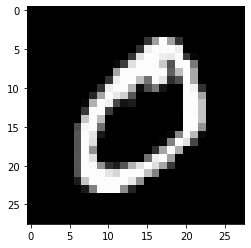

In [7]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Data Generator

In [8]:
# Set Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [10]:
inputs = image[tf.newaxis,...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [11]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

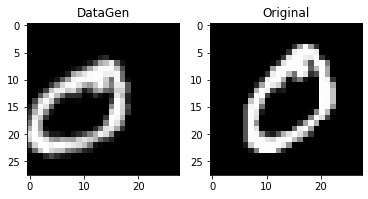

In [14]:
plt.subplot(121)
plt.title('DataGen')
plt.imshow(image[0,:,:,0], 'gray')
# plt.imshow(np.squeeze(image), 'gray) # 이 방법도 가능


plt.subplot(122)
plt.title('Original')
plt.imshow(tf.io.decode_image(tf.io.read_file(path))[:,:,0], 'gray')
plt.show()

## New image 오픈하지 않고 로드하기 

In [16]:
train_dir = google_path + '/training'
test_dir  = google_path + '/testing'

In [18]:
# Hyper Parameter Tunning

num_epochs = 10
batch_size = 32
lr = 1e-03
dropout_rate = 0.7
input_shape = (28,28,1)
num_classes = 10

In [19]:
# Preprocessing

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    width_shift_range = 0.3,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1/255.
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical',
)

Found 60001 images belonging to 10 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical',
)

Found 10000 images belonging to 10 classes.
